# 実数値GAの実装と実験

In [23]:
import numpy as np

# 目的関数（最小値を求めたい関数）の定義
def Rosenbrock_func(x_array):
    total = 0
    for i in range(1,len(x_array)):
        total += 100 * ((x_array[0] - x_array[i]**2)**2) + (1 - x_array[i])**2
    return total

# 個体の初期化
def initialize_population(population_size, dimention=50):
    return np.random.rand(population_size, dimention)

# 選択（トーナメント選択）
def selection(population, scores, k=3):
    # トーナメントのサイズ
    selection_ix = np.random.randint(len(population))
    for ix in np.random.randint(0, len(population), k-1):
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return population[selection_ix]

# 交叉（一点交叉）
def crossover(p1, p2, r_cross):
    p1, p2 = p1.copy(), p2.copy() 
    if np.random.rand() < r_cross:
        pt = np.random.randint(2, len(p1)-2)
        p1[pt:], p2[pt:] = p2[pt:].copy(), p1[pt:].copy()
    return [p1, p2]

# 突然変異
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        if np.random.rand() < r_mut:
            bitstring[i] += np.random.normal(0, 1)

# GAのメインの処理
def genetic_algorithm(objective, bounds, n_iter, n_pop, r_cross, r_mut):
    best_eval_history = [] # 世代ごとの最も評価値の高い個体
    pop = initialize_population(n_pop)
    best, best_eval = 0, objective(pop[0])
    for gen in range(n_iter):
        scores = [objective(c) for c in pop]
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
        best_eval_history.append(best_eval)
        selected = [selection(pop, scores) for _ in range(n_pop)]
        children = list()
        for i in range(0, n_pop, 2):
            p1, p2 = selected[i], selected[i+1]
            for c in crossover(p1, p2, r_cross):
                mutation(c, r_mut)
                children.append(c)
        pop = children
    return (best, best_eval, best_eval_history)

# GAの実行
bounds = np.asarray([[-5.0, 5.0]]*50)
best, score, history = genetic_algorithm(Rosenbrock_func, bounds, n_iter=200, n_pop=100, r_cross=0.9, r_mut=0.02)
print('Done!')
print('f(%s) = %f' % (best, score))
print(history)


Done!
f([0.19614432 0.46107766 0.34495212 0.38855263 0.39113632 0.38480507
 0.36710426 0.4552702  0.38983995 0.34853794 0.39595482 0.46720472
 0.52458894 0.49533412 0.44921477 0.48101792 0.35667218 0.37070404
 0.43643935 0.47028819 0.32328707 0.52259824 0.48451051 0.5283246
 0.43581978 0.51799839 0.50994659 0.51666417 0.44516222 0.46643418
 0.45941924 0.4879267  0.37097296 0.43994314 0.42134494 0.41808345
 0.42764188 0.40513996 0.44589702 0.44195395 0.46822246 0.4046818
 0.29503286 0.46206962 0.39947948 0.42573683 0.41933658 0.47869274
 0.4336057  0.42009233]) = 26.546795
[293.62969099219686, 275.2978311693672, 229.0869862699366, 228.43346946843465, 228.43346946843465, 228.43346946843465, 228.43346946843465, 195.82828344545314, 195.82828344545314, 191.69090301704227, 165.4349372466103, 165.4349372466103, 165.4349372466103, 165.4349372466103, 120.17410742993391, 120.17410742993391, 120.17410742993391, 120.17410742993391, 118.99030543394608, 118.99030543394608, 104.88302979706442, 99.265

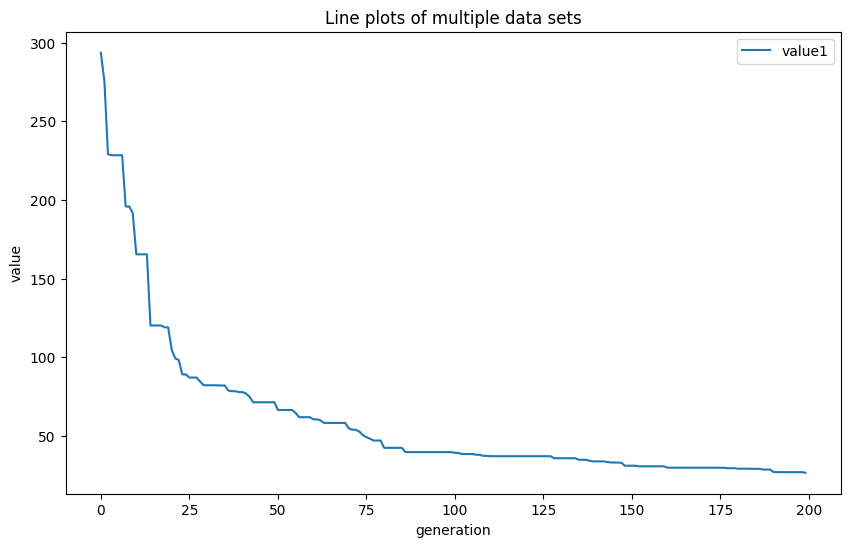

In [25]:
import matplotlib.pyplot as plt
def plot_history(history):
    plt.figure(figsize=(10,6))
    plt.plot(history, label='value1')
    plt.xlabel('generation')
    plt.ylabel('value')
    plt.title('Line plots of multiple data sets')
    plt.legend()
    plt.show()

## 実験
以下のようにパラメータを変化させることでどのように収束するかを確認する．
* n_pop([10, 100, 500, 1000]): 個体群のサイズ
* r_cross(0, 0.5, 0.9): 交叉率つまり，新しい世代の解を生成するための二つの解が交叉する確率
* r_mut(0. 0.01, 0.05, 0.1, 0.5): 突然変異率．大きいほどランダムサーチに近づく．

In [26]:
n_pops = [10, 100, 500, 1000]
r_crosses = [0, 0.5, 0.9]
r_muts = [0, 0.01, 0.05, 0.1, 0.5]

parameters = {}
for n_pop in n_pops:
    for r_cross in r_crosses:
        for r_mut in r_muts:
            key = str(n_pop) + "-" + str(r_cross) + "-" + str(r_mut)
            parameters[key] = [n_pop, r_cross, r_mut]
parameters

{'10-0-0': [10, 0, 0],
 '10-0-0.01': [10, 0, 0.01],
 '10-0-0.05': [10, 0, 0.05],
 '10-0-0.1': [10, 0, 0.1],
 '10-0-0.5': [10, 0, 0.5],
 '10-0.5-0': [10, 0.5, 0],
 '10-0.5-0.01': [10, 0.5, 0.01],
 '10-0.5-0.05': [10, 0.5, 0.05],
 '10-0.5-0.1': [10, 0.5, 0.1],
 '10-0.5-0.5': [10, 0.5, 0.5],
 '10-0.9-0': [10, 0.9, 0],
 '10-0.9-0.01': [10, 0.9, 0.01],
 '10-0.9-0.05': [10, 0.9, 0.05],
 '10-0.9-0.1': [10, 0.9, 0.1],
 '10-0.9-0.5': [10, 0.9, 0.5],
 '100-0-0': [100, 0, 0],
 '100-0-0.01': [100, 0, 0.01],
 '100-0-0.05': [100, 0, 0.05],
 '100-0-0.1': [100, 0, 0.1],
 '100-0-0.5': [100, 0, 0.5],
 '100-0.5-0': [100, 0.5, 0],
 '100-0.5-0.01': [100, 0.5, 0.01],
 '100-0.5-0.05': [100, 0.5, 0.05],
 '100-0.5-0.1': [100, 0.5, 0.1],
 '100-0.5-0.5': [100, 0.5, 0.5],
 '100-0.9-0': [100, 0.9, 0],
 '100-0.9-0.01': [100, 0.9, 0.01],
 '100-0.9-0.05': [100, 0.9, 0.05],
 '100-0.9-0.1': [100, 0.9, 0.1],
 '100-0.9-0.5': [100, 0.9, 0.5],
 '500-0-0': [500, 0, 0],
 '500-0-0.01': [500, 0, 0.01],
 '500-0-0.05': [500, 0, 

In [31]:
histories = {}
for key in parameters:
    para_list = parameters[key]
    n_pop = para_list[0]
    r_cross = para_list[1]
    r_mut = para_list[2]
    best, score, history = genetic_algorithm(Rosenbrock_func, bounds, n_iter=200, n_pop=n_pop, r_cross=r_cross, r_mut=r_mut)
    histories[key] = history
    print(key + ": " + str(score))

10-0-0: 307.58102639826757
10-0-0.01: 124.10592228357477
10-0-0.05: 420.94851591100206
10-0-0.1: 341.61516611095647
10-0-0.5: 308.55350467247723
10-0.5-0: 411.30317174399806
10-0.5-0.01: 87.93721351676623
10-0.5-0.05: 518.0819122660107
10-0.5-0.1: 300.7653033423178
10-0.5-0.5: 469.82662308506855
10-0.9-0: 499.20085311687575
10-0.9-0.01: 109.46516939577079
10-0.9-0.05: 316.7316810579652
10-0.9-0.1: 536.0472986267715
10-0.9-0.5: 383.145264175372
100-0-0: 303.9740958802549
100-0-0.01: 43.754165249237744
100-0-0.05: 229.92802841905996
100-0-0.1: 282.6041372362942
100-0-0.5: 405.40773699121536
100-0.5-0: 125.42770187562444
100-0.5-0.01: 22.011660426004237
100-0.5-0.05: 171.65581219808448
100-0.5-0.1: 312.19847538080086
100-0.5-0.5: 337.7480017545927
100-0.9-0: 166.1119954626606
100-0.9-0.01: 19.445532569866433
100-0.9-0.05: 154.93456571847452
100-0.9-0.1: 327.4718708215268
100-0.9-0.5: 304.2185333651827
500-0-0: 336.0181320706657
500-0-0.01: 29.68865364121606
500-0-0.05: 193.33401723579516


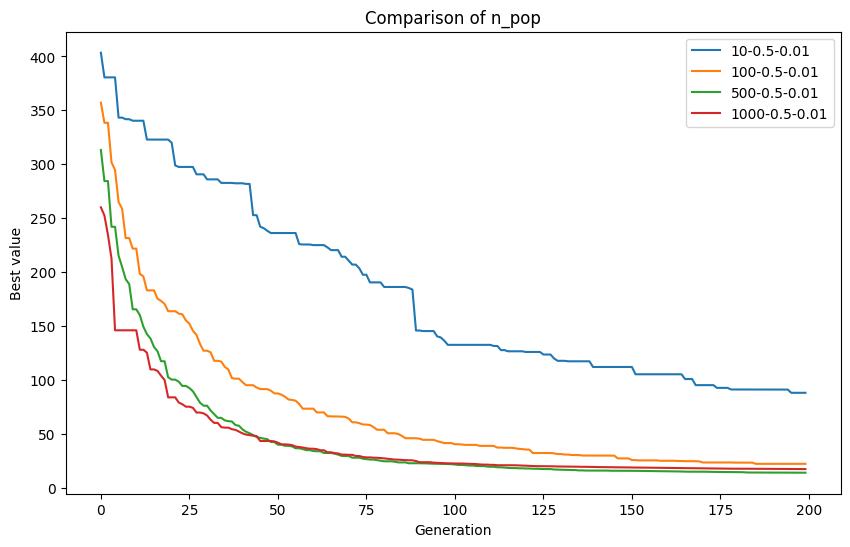

In [42]:
plt.figure(figsize=(10,6))
plt.plot(histories['10-0.5-0.01'], label='10-0.5-0.01')
plt.plot(histories['100-0.5-0.01'], label='100-0.5-0.01')
plt.plot(histories['500-0.5-0.01'], label='500-0.5-0.01')
plt.plot(histories['1000-0.5-0.01'], label='1000-0.5-0.01')
plt.xlabel('Generation')
plt.ylabel('Best value')
plt.title('Comparison of n_pop')
plt.legend()
plt.show()

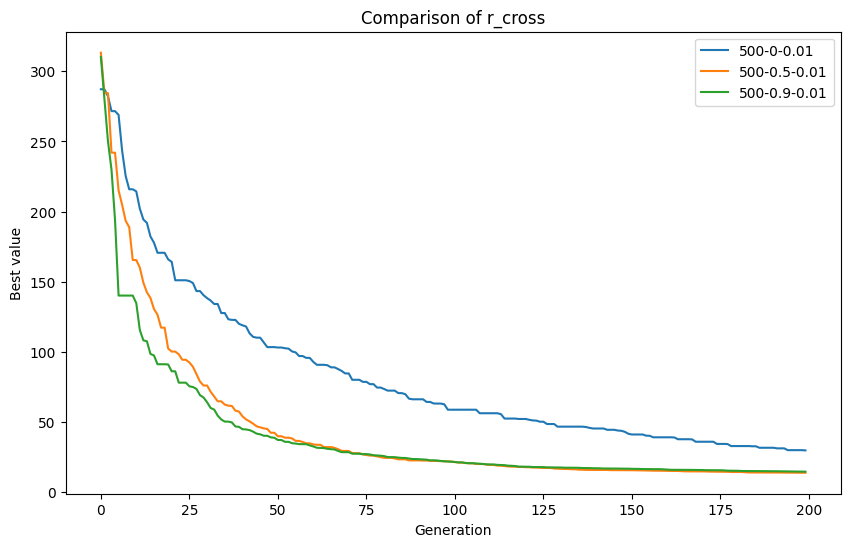

In [43]:
plt.figure(figsize=(10,6))
plt.plot(histories['500-0-0.01'], label='500-0-0.01')
plt.plot(histories['500-0.5-0.01'], label='500-0.5-0.01')
plt.plot(histories['500-0.9-0.01'], label='500-0.9-0.01')
plt.xlabel('Generation')
plt.ylabel('Best value')
plt.title('Comparison of r_cross')
plt.legend()
plt.show()

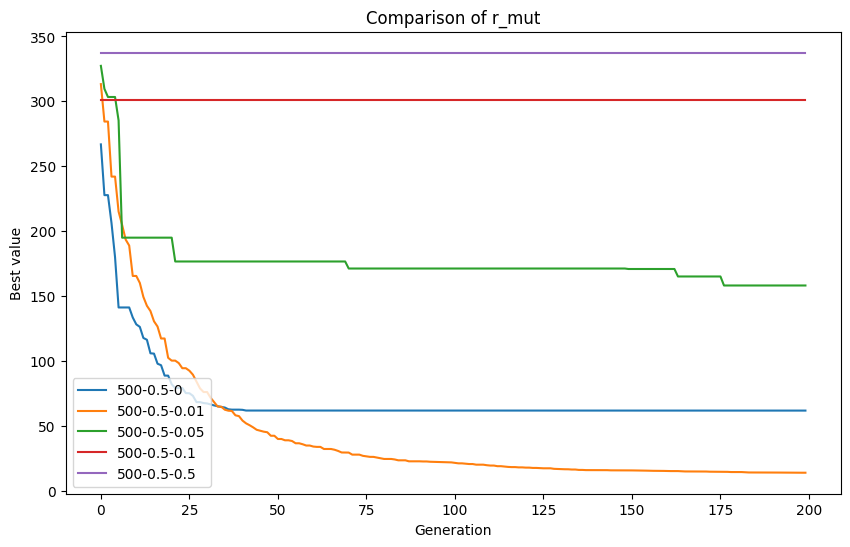

In [44]:
plt.figure(figsize=(10,6))
plt.plot(histories['500-0.5-0'], label='500-0.5-0')
plt.plot(histories['500-0.5-0.01'], label='500-0.5-0.01')
plt.plot(histories['500-0.5-0.05'], label='500-0.5-0.05')
plt.plot(histories['500-0.5-0.1'], label='500-0.5-0.1')
plt.plot(histories['500-0.5-0.5'], label='500-0.5-0.5')
plt.xlabel('Generation')
plt.ylabel('Best value')
plt.title('Comparison of r_mut')
plt.legend()
plt.show()